##Задание №1

Загрузите данные о диагностике сахарного 
диабета

In [ ]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)
pima = pima[1:]

In [ ]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


Задание №2

Разделите эти данные на тестовую и обучающую выборки

In [ ]:
Y = pima.label
X = pima.drop(['label'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

##Задание №3

Постройте модель классификации для определения заболевания

In [ ]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()

In [ ]:
cls.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = cls.predict(x_test)
y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0',
       '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0'],
      dtype=object)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]])

Text(0.5, 15.0, 'Предсказанные значения')

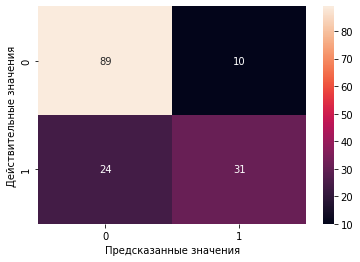

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

##Задание №4

Оцените качество модели на тестовой выборке с помощью следующих метрик:

-достоверность предсказания (accuracy);

-точность (precision);

-полнота (recall);

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

In [ ]:
metrics.precision_score(y_test, y_pred, pos_label="1")

SyntaxError: ignored

In [ ]:
metrics.recall_score(y_test, y_pred, pos_label="1")

0.5636363636363636

##Задание №5

Сделайте вывод о применимости модели

1


Дополнительные задания

### Задание №1

Используйте метод опорных векторов для построения альтернативной модели предсказания диабета

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
clf

SVC()

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array(['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0',
       '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0'],
      dtype=object)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7857142857142857

In [ ]:
metrics.precision_score(y_test, y_pred, pos_label="1")

0.8235294117647058

In [ ]:
metrics.recall_score(y_test, y_pred, pos_label="1")

0.509090909090909

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[93  6]
 [27 28]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.82      0.51      0.63        55

    accuracy                           0.79       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.79      0.79      0.77       154



##Задание №2

Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание

Метрики метода опорных векторов в общем показал результаты лучше, несмотря на то, что recall слегка хуже сработал.

##Задание №3

Постройте модели классификации на основе следующих методов:

-логистическая регрессия (LogisticRegression);

-метод опорных векторов с линейным ядром (SVC);

-метод опорных векторов с гауссовым ядром (SVC);

-метод k ближайших соседей (KNeighborsClassifier);

-многослойный перцептрон (MLP);

-другие методы по желанию;

##Логистическая регрессия (LogisticRegression)

In [ ]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()

In [ ]:
cls.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = cls.predict(x_test)
y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0',
       '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[89 10]
 [24 31]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



##Метод опорных векторов с линейным ядром (SVC)

In [ ]:
from sklearn.svm import SVC
cll = SVC(kernel='linear', random_state=True)
cll.fit(x_train, y_train)

SVC(kernel='linear', random_state=True)

In [ ]:
cll.fit(x_train, y_train)

SVC(kernel='linear', random_state=True)

In [ ]:
y_pred = cll.predict(x_test)
y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0',
       '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[89 10]
 [24 31]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



##Метод опорных векторов с гауссовым ядром (SVC)

In [ ]:
from sklearn.svm import SVC
clr = SVC(kernel='rbf', random_state=True)
clr.fit(x_train, y_train)

SVC(random_state=True)

In [ ]:
clr.fit(x_train, y_train)

SVC(random_state=True)

In [ ]:
y_pred = clr.predict(x_test)
y_pred

array(['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0',
       '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[93  6]
 [27 28]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.82      0.51      0.63        55

    accuracy                           0.79       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.79      0.79      0.77       154



##Метод k ближайших соседей (KNeighborsClassifier)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model1 = KNeighborsClassifier()

In [ ]:
model1.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model1.predict(x_test)
y_pred

array(['1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1',
       '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1',
       '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1',
       '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[82 17]
 [24 31]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



##Многослойный перцептрон (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model2 = MLPClassifier()

In [ ]:
model2.fit(x_train, y_train)

MLPClassifier()

In [ ]:
y_pred = model2.predict(x_test)
y_pred

array(['1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0'], dtype='<U1')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[95  4]
 [46  9]]
              precision    recall  f1-score   support

           0       0.67      0.96      0.79        99
           1       0.69      0.16      0.26        55

    accuracy                           0.68       154
   macro avg       0.68      0.56      0.53       154
weighted avg       0.68      0.68      0.60       154



##Классификатор дерева решения

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[74 25]
 [25 30]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        99
           1       0.55      0.55      0.55        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



##Задание №4

#Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую

Так как общая оценка эффективности модели f1-score у логистической регрессии наибольшая, соответсвенно эта модель является наилучшей для этой выборки среди всех остальных моделей.

##Задание №5

Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
def plot_learning_curve(x_train, x_test, y_train_, y_test, model, name, ax):
  # Создайте конвейер; Это будет передано в качестве оценки в метод кривой обучения
  pipeline = make_pipeline(StandardScaler(), model)

  # Используйте кривую обучения, чтобы получить результаты тренировок и тестов, а также размеры поездов
  train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=x_train, y=y_train,
  cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
  n_jobs=1)

  # Рассчитайте среднее значение обучения и тестирования и std
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Постройте кривую обучения
  ax.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  ax.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  ax.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
  ax.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  ax.set_title(f'Learning Curve of {name}')
  ax.set_xlabel('Training Data Size')
  ax.set_ylabel('Model accuracy')
  ax.grid()
  ax.legend(loc='lower right')


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

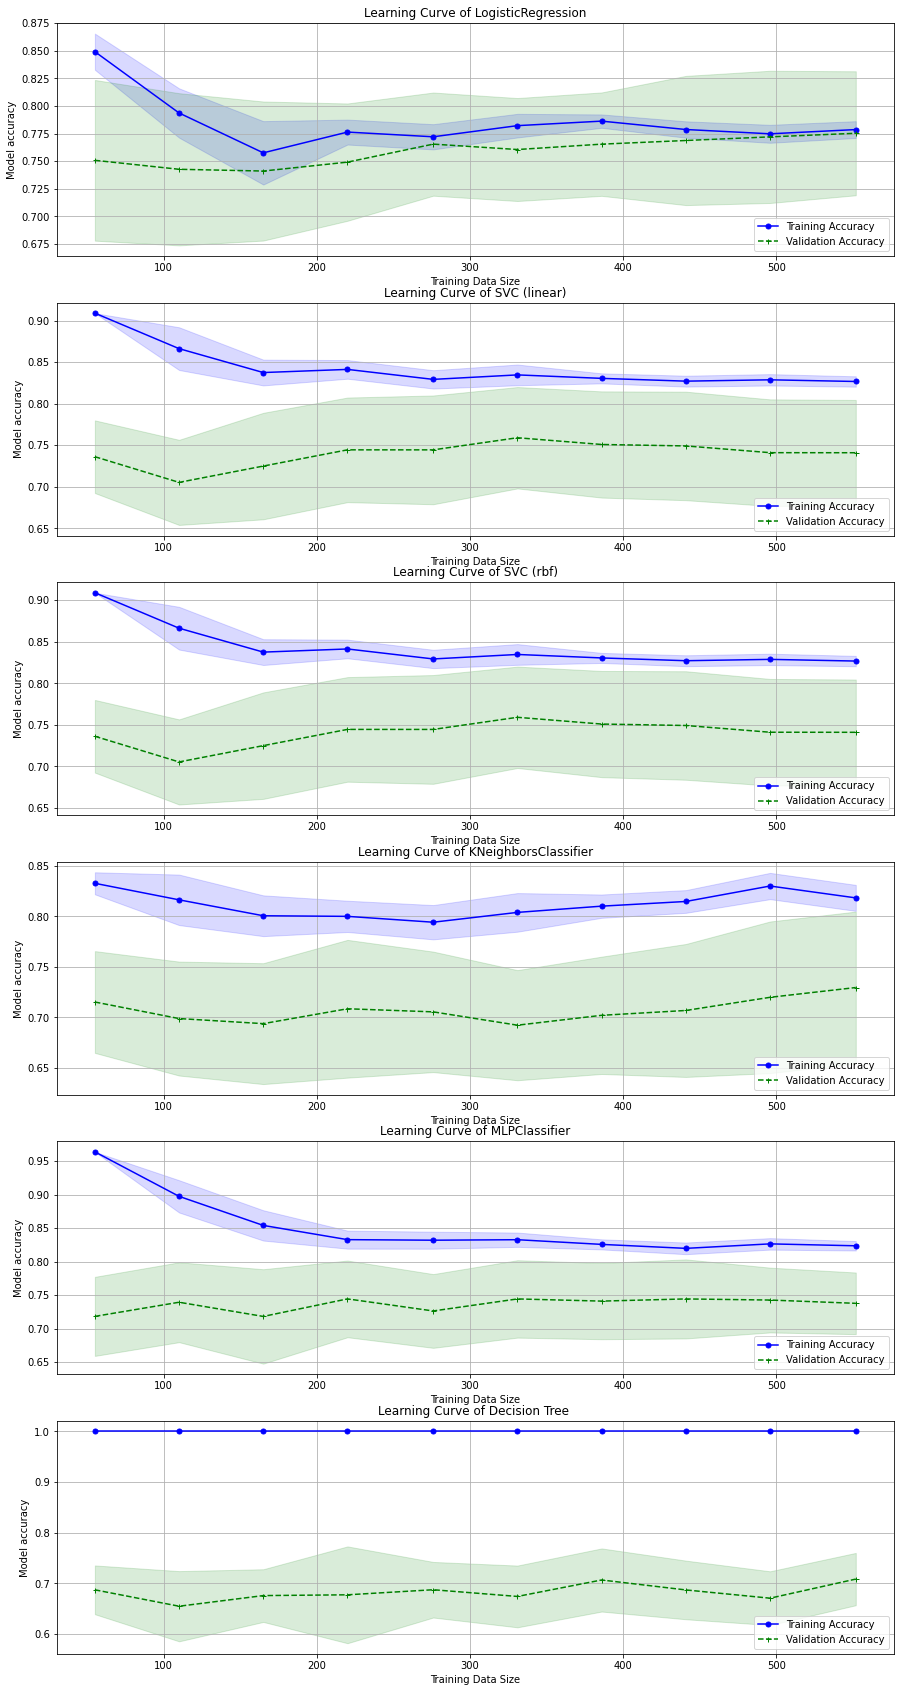

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(15, 30))

plot_learning_curve(x_train, x_test, y_train, y_test, cls, 'LogisticRegression', ax1)
plot_learning_curve(x_train, x_test, y_train, y_test, clf, 'SVC (linear)', ax2)
plot_learning_curve(x_train, x_test, y_train, y_test, clr, 'SVC (rbf)', ax3)
plot_learning_curve(x_train, x_test, y_train, y_test, model1, 'KNeighborsClassifier', ax4)
plot_learning_curve(x_train, x_test, y_train, y_test, model2, 'MLPClassifier', ax5)
plot_learning_curve(x_train, x_test, y_train, y_test, classifier, 'Decision Tree ', ax6)


##Задание №6

Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris())